<a href="https://www.kaggle.com/code/muhammadmuaviamalik/data-analysis-pyspark-with-python?scriptVersionId=155832147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-tshirts-data/Finaldata.csv


# M.MUAVIA BAI-20S-018

# 1. Setting Up Apache Spark Environment

In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=6c35697acd3dcfff8efc27a6e197965398f612419ab4141507cce8a77f5ff537
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


# 2. Exploring RDDs (Resilient Distributed Datasets)

In [3]:
from pyspark import SparkContext, SparkConf

# Initialize Spark
conf = SparkConf().setAppName("PySpark")
sc = SparkContext(conf=conf)

# Task 1: Create an RDD from a local file
file_path = "/kaggle/input/amazon-tshirts-data/Finaldata.csv"
rdd = sc.textFile(file_path)

# Task 2: Perform basic transformations (map, filter) and actions (count, collect)
# Transformation 1: Map - Convert each line to uppercase
rdd_uppercase = rdd.map(lambda x: x.upper())

# Transformation 2: Filter - Keep lines containing the word "Spark"
rdd_spark_lines = rdd.filter(lambda x: "Spark" in x)

# Action 1: Count - Count the total number of lines
total_lines = rdd.count()

# Action 2: Collect - Retrieve the results and print them
uppercase_lines = rdd_uppercase.collect()
spark_lines = rdd_spark_lines.collect()

# Print the results
print("Original RDD:")
for line in rdd.take(5):  # Display the first 5 lines
    print(line)

print("\nTransformed RDD (Uppercase):")
for line in uppercase_lines:
    print(line)

print("\nFiltered RDD (Lines containing 'Spark'):")
for line in spark_lines:
    print(line)

print(f"\nTotal number of lines: {total_lines}")

# Stop SparkContext
sc.stop()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/20 15:50:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Original RDD:
Company,OGPrice,DPrice,Discount,Link,Rating
Puma,"1,499",669,55,https://www.amazon.in/s?i=apparel&bbn=1968120031&rh=n%3A1968120031%2Cp_85%3A10440599031%2Cp_n_specials_match%3A21618256031%2Cp_89%3AAdidas%7CAllen+Solly%7CAmazon+Brand+-+Symbol%7CCalvin+Klein%7CChromozome%7CColumbia%7CDuke%7CFila%7CJack+%26+Jones%7CJockey%7CLee%7CLee+Cooper%7CLevi%27s%7CMarks+%26+Spencer%7CMonte+Carlo%7CNike%7CPARK+AVENUE%7CPark+Avenue%7CPepe+Jeans%7CPeter+England%7CPuma%7CRed+Tape%7CReebok%7CSpykar%7CTommy+Hilfiger%7CU.S.+POLO+ASSN.%7CUSPA%7CUnited+Colors+of+Benetton%7CVan+Heusen%7CVan+Heusen+Athleisure%7CWrangler%7Cblackberrys%2Cp_n_pct-off-with-tax%3A50-%2Cp_72%3A1318476031&s=review-rank&dc&hidden-keywords=-women-woman-short-girl-boy-shoe-pant&pf_rd_i=1968024031%2C1968024031%2C1968024031%2C80226347031&pf_rd_m=A1VBAL9TL5WCBF%2CA1VBAL9TL5WCBF%2CA1VBAL9TL5WCBF%2CA1VBAL9TL5WCBF&pf_rd_p=39c07540-1c20-4bfc-a531-3c197ce08b4d%2Ca5f5c43e-cfc4-45c4-a60b-9e77b08f9433%2Cc7e10fa2-a46e-43e8-9b05-58ee2e0

**#Explain the lazy evaluation concept in Spark.**

Spark employs lazy evaluation, meaning transformations on datasets are delayed until you actually take an action like "count" or "collect". Think of it like building a recipe: 
you list the ingredients (transformations), but you only start cooking (execution) when someone asks for the dish (action). This saves resources by:

**Avoiding unnecessary processing:** Only transform data used in the final result.

**Efficiently pipelining operations:** Chain transformations without materializing intermediate results.

**Reducing disk I/O and memory usage:** Store only needed data at each step.

# 3. Word Count Example

<Figure size 1200x600 with 0 Axes>

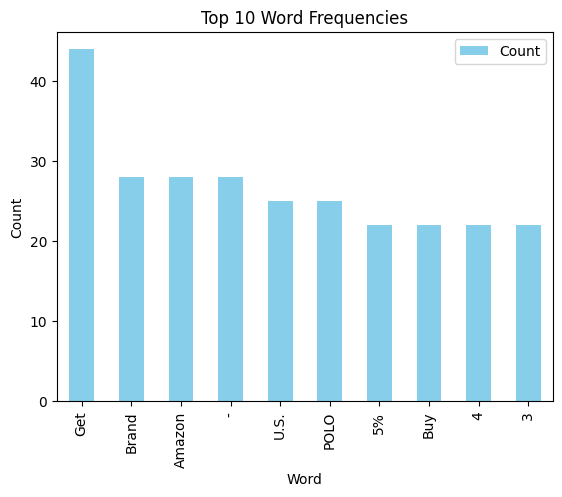

In [4]:
#Import Dependencies
from pyspark import SparkContext, SparkConf
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Spark
conf = SparkConf().setAppName("WordCount")
sc = SparkContext(conf=conf)

# Read a text file and create an RDD
file_path = "/kaggle/input/amazon-tshirts-data/Finaldata.csv"  # Replace with your file path
rdd = sc.textFile(file_path)

# Tokenize words and perform Word Count
word_counts = (
    rdd.flatMap(lambda line: line.split())
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
    .sortBy(lambda x: x[1], ascending=False)
)

# Collect the results
results = word_counts.collect()

# Visualize word frequency using a bar chart
df = pd.DataFrame(results, columns=["Word", "Count"])

# Plotting
plt.figure(figsize=(12, 6))
df.head(10).plot(kind="bar", x="Word", y="Count", color="skyblue")
plt.title("Top 10 Word Frequencies")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

# Stop SparkContext
sc.stop()


# 4. Basic Data Analysis

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("DataExploration").getOrCreate()

# Task 1: Load a dataset (CSV) into Spark DataFrame
file_path = "/kaggle/input/amazon-tshirts-data/Finaldata.csv"  # Replace with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Task 2: Display schema and summary statistics
print("DataFrame Schema:")
df.printSchema()

print("\nSummary Statistics:")
df.describe().show()

# Task 3: Filter and select specific columns
filtered_df = df.filter(col("OGPrice") > 200).select("Company", "OGPrice", "DPrice","Discount")

# Task 4: Group data and calculate aggregations
grouped_df = df.groupBy("Company").agg({"OGPrice": "avg", "Discount": "avg"})

# Display results
print("\nFiltered DataFrame (Price > 200):")
filtered_df.show()

print("\nGrouped DataFrame (Average OGPrice and Discount by company):")
grouped_df.show()

# Stop SparkSession
spark.stop()


DataFrame Schema:
root
 |-- Company: string (nullable = true)
 |-- OGPrice: string (nullable = true)
 |-- DPrice: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Link: string (nullable = true)
 |-- Rating: double (nullable = true)


Summary Statistics:


23/12/20 15:50:25 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------+--------------------+-----------------+-----------------+--------------------+-------------------+
|summary| Company|             OGPrice|           DPrice|         Discount|                Link|             Rating|
+-------+--------+--------------------+-----------------+-----------------+--------------------+-------------------+
|  count|     192|                 192|              192|              192|                 192|                144|
|   mean|    NULL|   829.8333333333334| 689.421768707483|59.48571428571429|                NULL|  4.357638888888891|
| stddev|    NULL|  110.98389181509289|163.1477574340339| 8.59554625577337|                NULL|0.31899752527946224|
|    min|  Adidas|% coupon applied ...|            1,000|               ,5|https://www.amazo...|                3.9|
|    max|Wrangler|uy 3 Get 5% Off, ...|         ₹799₹799|               wi|https://www.amazo...|                5.0|
+-------+--------+--------------------+-----------------+-------

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/kaggle/input/amazon-tshirts-data/Finaldata.csv")
df.head()


,Company,OGPrice,DPrice,Discount,Link,Rating
0,Puma,"1,499",669,55,https://www.amazon.in/s?i=apparel&bbn=19681200...,NaN
1,Puma,"5,499","2,579",53,https://www.amazon.in/s?i=apparel&bbn=19681200...,NaN
2,Adidas,"4,999","2,499",50,https://www.amazon.in/s?i=apparel&bbn=19681200...,NaN
3,Columbia,"3,299","1,209",63,https://www.amazon.in/s?i=apparel&bbn=19681200...,NaN
4,Puma,"5,499","2,029",63,https://www.amazon.in/s?i=apparel&bbn=19681200...,NaN


In [7]:
df.tail()

,Company,OGPrice,DPrice,Discount,Link,Rating
187,Amazon Brand - Symbol,"2,499",299,88,https://www.amazon.in/s?i=apparel&bbn=19681200...,4.0
188,Levi's,"2,399",719,70,https://www.amazon.in/s?i=apparel&bbn=19681200...,4.0
189,Lee,"uy 3 Get 5% Off, Buy 4 Get 10% OffBuy 3 Get 5%...",699,uy,https://www.amazon.in/s?i=apparel&bbn=19681200...,4.3
190,Amazon Brand - Symbol,"1,398",₹579₹579,59,https://www.amazon.in/s?i=apparel&bbn=19681200...,4.1
191,Puma,"1,499",647.,57,https://www.amazon.in/s?i=apparel&bbn=19681200...,4.0
